## Image Classification

### 1. Install Dependencies and Setup

In [2]:
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 2. Load Data

In [3]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 304 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

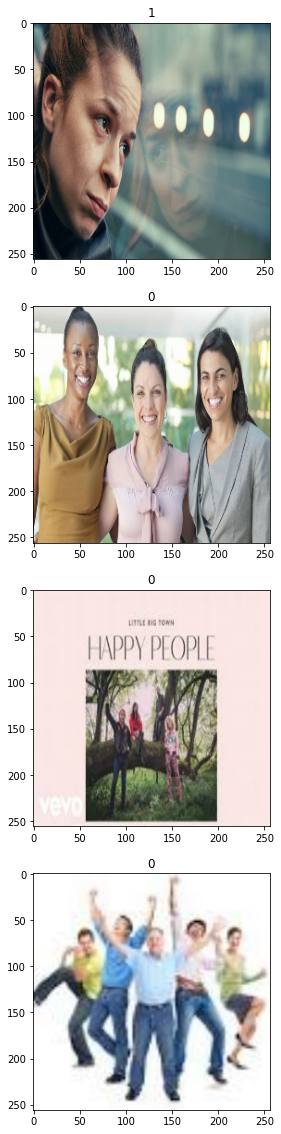

In [30]:
fig, ax = plt.subplots(4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(batch[1][idx])

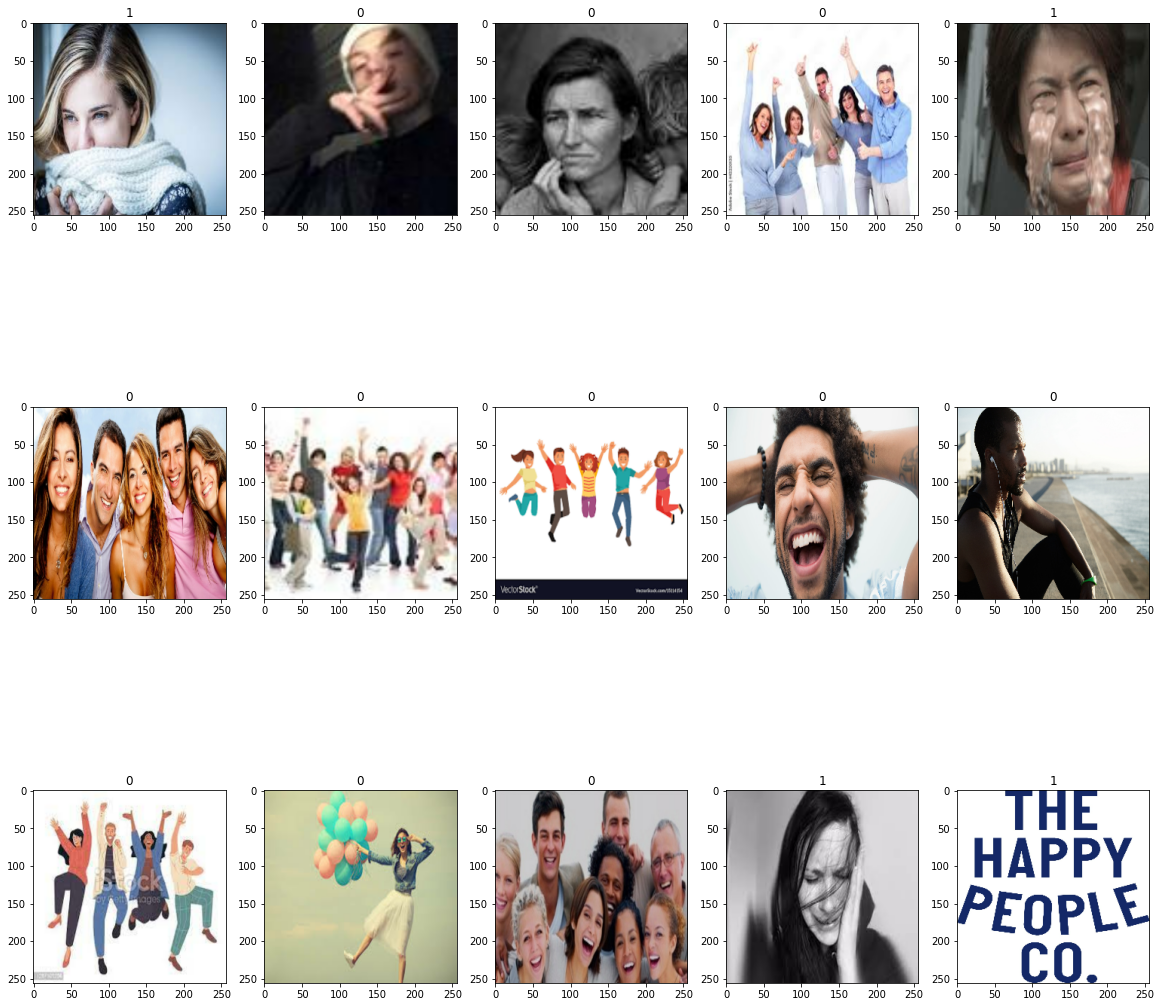

In [35]:
fig, ax = plt.subplots(3, 5, figsize=(20, 20))
for idx, img in enumerate(batch[0][14:29]):
    ax[idx // 5, idx % 5].imshow(img.astype(int))
    ax[idx // 5, idx % 5].set_title(batch[1][idx])

### 3. Scale Data

In [37]:
data = data.map(lambda x,y: (x/255, y))

In [38]:
data.as_numpy_iterator().next()

(array([[[[0.08627451, 0.08235294, 0.06666667],
          [0.08627451, 0.08235294, 0.06666667],
          [0.08627451, 0.08235294, 0.06666667],
          ...,
          [0.04705882, 0.03921569, 0.04313726],
          [0.04705882, 0.03921569, 0.04313726],
          [0.04705882, 0.03921569, 0.04313726]],
 
         [[0.08560049, 0.08167892, 0.06599265],
          [0.08562945, 0.08170788, 0.06602161],
          [0.0857611 , 0.08183952, 0.06615325],
          ...,
          [0.04672181, 0.03887868, 0.04280024],
          [0.04672181, 0.03887868, 0.04280024],
          [0.04672181, 0.03887868, 0.04280024]],
 
         [[0.08253676, 0.0786152 , 0.06292892],
          [0.08269737, 0.0787758 , 0.06308953],
          [0.0834274 , 0.07950583, 0.06381956],
          ...,
          [0.04518995, 0.03734681, 0.04126838],
          [0.04518995, 0.03734681, 0.04126838],
          [0.04518995, 0.03734681, 0.04126838]],
 
         ...,
 
         [[0.4584559 , 0.35257354, 0.24669118],
          [0.45710

In [39]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [45]:
train_size

7

In [42]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### 4.Model Building

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [52]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [54]:
model_history = model.fit(train, epochs=20, validation_data=val, callbacks=[callback])

Epoch 1/20
7/7 [==============================] - 25s 2s/step - loss: 0.9072 - accuracy: 0.5223 - val_loss: 0.6984 - val_accuracy: 0.4688
Epoch 2/20
7/7 [==============================] - 17s 2s/step - loss: 0.6805 - accuracy: 0.6607 - val_loss: 0.6626 - val_accuracy: 0.4844
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 0.6617 - accuracy: 0.5179 - val_loss: 0.6325 - val_accuracy: 0.5312
Epoch 4/20
7/7 [==============================] - 20s 2s/step - loss: 0.6131 - accuracy: 0.5580 - val_loss: 0.6001 - val_accuracy: 0.7969
Epoch 5/20
7/7 [==============================] - 22s 3s/step - loss: 0.6164 - accuracy: 0.6920 - val_loss: 0.5557 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 22s 3s/step - loss: 0.4970 - accuracy: 0.8304 - val_loss: 0.4484 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 21s 2s/step - loss: 0.3685 - accuracy: 0.8750 - val_loss: 0.3402 - val_accuracy: 0.8750
Epoch 8/20
7/7 [==================

### 6. Plot Performance and Evaluate

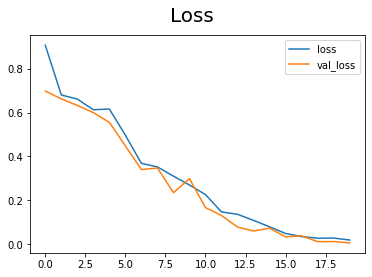

In [56]:
fig = plt.figure()
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'],label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="best")
plt.show()

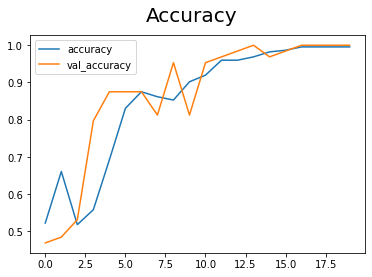

In [57]:
fig = plt.figure()
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="best")
plt.show()

In [63]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

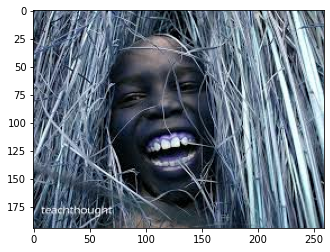

In [67]:
img = cv2.imread('images (2).jpeg')
plt.imshow(img)
plt.show()

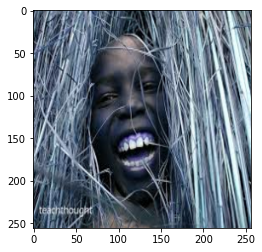

In [68]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 272ms/step


In [70]:
yhat
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


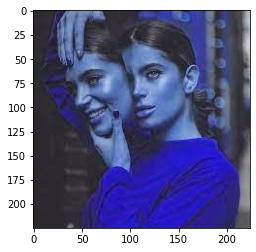

In [72]:
img = cv2.imread('images.jpeg')
plt.imshow(img)
plt.show()

In [73]:
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 85ms/step


In [74]:
yhat
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


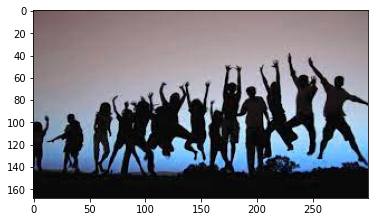

In [75]:
img = cv2.imread('images_2.jpeg')
plt.imshow(img)
plt.show()

In [76]:
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 75ms/step


In [78]:
yhat
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


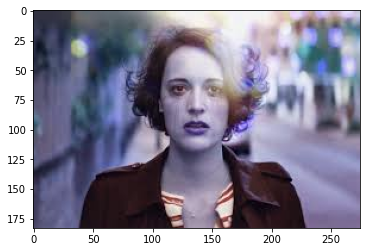

In [80]:
img = cv2.imread('images_1.jpg')
plt.imshow(img)
plt.show()

In [81]:
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 213ms/step


In [82]:
yhat
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
